# <font color=green>Data Analysis for CUTE-2</font>

#### <font color=orange>Click bellow for redirecting to repsective sections</font>

1. [Load the Train Data file](#Load-the-Train-Data-file)
2. [Drop columns which will not be part of analysis](#Drop-columns-which-will-not-be-part-of-analysis)
3. [Change target attribute data type to categorical type](#Change-target-attribute-data-type-to-categorical-type)
    
4. [Descriptive Analysis of Dataset](#Descriptive-Analysis-of-Dataset)
    
    4.1 [Let's see how many records and attributes we have in our data set](#Let's-see-how-many-records-and-attributes-we-have-in-our-data-set)
    
    4.2 [Let's explore the features of our dataset](#Let's-explore-the-features-of-our-dataset)
    
         
5. [Check for missing values](#Check-for-missing-values)
6. [Correlation plot among independent variable](#Correlation-plot-among-independent-variable)
7. [Split the data into predictor and target variable](#Split-the-data-into-predictor-and-target-variable)
8. [Apply Logistic Regression](#Apply-Logistic-Regression)
9. [K-Fold Cross validation](#K-Fold-Cross-validation)
10. [Predict on Train data](#Predict-on-Train-data)
11. [Confusion Matrix Evaluation Metrics](#Confusion-Matrix-Evaluation-Metrics)
12. [ROC Curve](#ROC-Curve)
13. [Load the Test data](#Load-the-Test-data)
    
    13.1 [Confusion Matrix Evaluation Metrics for Test data](#Confusion-Matrix-Evaluation-Metrics-for-Test-data)
14. [ROC Curve of Test Data](#ROC-Curve-of-Test-Data)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# <font color=green>Load the Train Data file</font>

In [3]:
train_DF = pd.read_csv("CSE7302c_train-1539668060821.csv",sep=',')

# <font color='green'>Drop columns which will not be part of analysis</font>

In [4]:
train_DF = train_DF.drop(['m_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb','id'], axis=1)

# <font color=green>Change target attribute data type to categorical type</font>

In [5]:
train_DF['class'] = train_DF['class'].astype('category')

# <font color=green>Descriptive Analysis of Dataset</font>

In [6]:
train_DF.head()

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b.tag,...,jet2phi,jet2b.tag,jet3pt,jet3eta,jet3phi,jet3b.tag,jet4pt,jet4eta,jet4phi,jet4b.tag
0,1,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,1.271015,2.214872,0.499994,-1.261432,0.732156,0.000000,0.398701,-1.138930,-0.000819,0.000000
1,1,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,-0.819690,2.214872,0.993490,0.356080,-0.208778,2.548224,1.256955,1.128848,0.900461,0.000000
2,0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,0.736159,2.214872,1.298720,-1.430738,-0.364658,0.000000,0.745313,-0.678379,-1.360356,0.000000
3,0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,1.426367,0.000000,0.921661,-1.190432,-1.615589,0.000000,0.651114,-0.654227,-1.274345,3.101961
4,1,0.409391,-1.884684,-1.027292,1.672452,-1.604598,1.338015,0.055427,0.013466,2.173076,...,0.707862,0.000000,0.746918,-0.358465,-1.646654,0.000000,0.367058,0.069496,1.377130,3.101961


In [7]:
train_DF.describe()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b.tag,jet2pt,...,jet2phi,jet2b.tag,jet3pt,jet3eta,jet3phi,jet3b.tag,jet4pt,jet4eta,jet4phi,jet4b.tag
count,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,...,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000
mean,0.989390,-0.004752,-0.000865,0.998634,-0.004615,0.988293,-0.004521,0.001059,0.997492,0.991622,...,0.006480,1.005221,0.992581,0.002618,0.000623,1.003886,0.985643,-0.005873,-0.001390,0.989418
std,0.562599,1.005846,1.006407,0.597851,1.006065,0.473853,1.010098,1.007629,1.026956,0.498138,...,1.006456,1.049643,0.488648,1.009840,1.005934,1.196556,0.502981,1.009085,1.007525,1.395692
min,0.274697,-2.434976,-1.742508,0.001283,-1.743944,0.140434,-2.968735,-1.741237,0.000000,0.189737,...,-1.742372,0.000000,0.263608,-2.728753,-1.742069,0.000000,0.365354,-2.497265,-1.742691,0.000000
25%,0.590204,-0.744166,-0.869156,0.578363,-0.877512,0.676977,-0.696157,-0.864770,0.000000,0.656964,...,-0.863521,0.000000,0.653311,-0.695257,-0.866142,0.000000,0.617767,-0.721686,-0.874392,0.000000
50%,0.853738,-0.003950,0.003191,0.892574,-0.008968,0.892804,-0.002006,-0.006040,1.086538,0.889382,...,0.012106,1.107436,0.897249,0.002904,-0.000197,0.000000,0.870424,-0.007956,-0.004703,0.000000
75%,1.234030,0.734318,0.869884,1.294878,0.867539,1.167717,0.689175,0.873302,2.173076,1.200490,...,0.880414,2.214872,1.221973,0.701975,0.875833,2.548224,1.220443,0.709938,0.874380,3.101961
max,7.805887,2.433894,1.743236,7.998711,1.743229,6.534160,2.964723,1.741454,2.173076,6.498635,...,1.743175,2.214872,8.509908,2.730009,1.742884,2.548224,6.605096,2.498009,1.743372,3.101961


<font color=red>lepton_pT, missing_energy_magnitude, jet1pt, jet2pt, jet3pt, jet4pt features might contains influential points or outliers</font>

### Let's see how many records and attributes we have in our data set

In [8]:
train_DF.shape

(68636, 22)

Our Dataset has 22 features with 68636 records

### Let's explore the features of our dataset

In [9]:
train_DF.dtypes

class                       category
lepton_pT                    float64
lepton_eta                   float64
lepton_phi                   float64
missing_energy_magnitude     float64
missing_energy_phi           float64
jet1pt                       float64
jet1eta                      float64
jet1phi                      float64
jet1b.tag                    float64
jet2pt                       float64
jet2eta                      float64
jet2phi                      float64
jet2b.tag                    float64
jet3pt                       float64
jet3eta                      float64
jet3phi                      float64
jet3b.tag                    float64
jet4pt                       float64
jet4eta                      float64
jet4phi                      float64
jet4b.tag                    float64
dtype: object

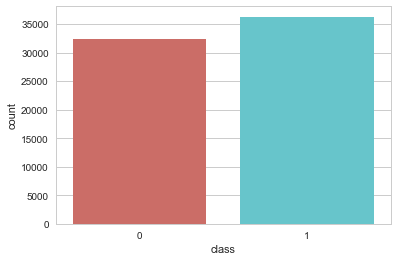

In [10]:
sns.countplot(x=train_DF['class'],data=train_DF, palette='hls')
plt.show()

# <font color=green>Check for missing values</font>

In [11]:
train_DF.isna().sum()

class                       0
lepton_pT                   0
lepton_eta                  0
lepton_phi                  0
missing_energy_magnitude    0
missing_energy_phi          0
jet1pt                      0
jet1eta                     0
jet1phi                     0
jet1b.tag                   0
jet2pt                      0
jet2eta                     0
jet2phi                     0
jet2b.tag                   0
jet3pt                      0
jet3eta                     0
jet3phi                     0
jet3b.tag                   0
jet4pt                      0
jet4eta                     0
jet4phi                     0
jet4b.tag                   0
dtype: int64

# <font color=green>Correlation plot among independent variable</font>

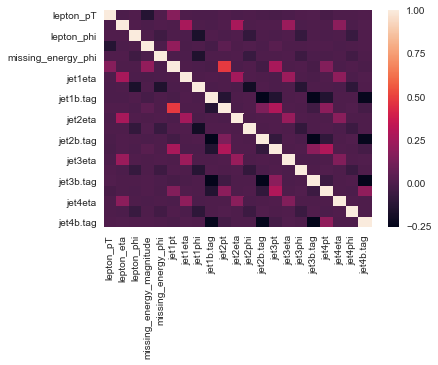

In [12]:
sns.heatmap(train_DF.corr())
plt.show()

# <font color=green>Split the data into predictor and target variable</font>

In [13]:
X = train_DF.iloc[:,1:22]
y = train_DF.iloc[:,0]

# <font color=green>Apply Logistic Regression</font>

In [14]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# <font color=green>K-Fold Cross validation</font>

In [15]:
model = logisticRegr

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10,random_state=9, shuffle=True)
print(sorted(list(cross_val_score(model, X_test, y_test, cv=kf))))
#print(cross_val_score(model, X_test, y_test, cv=kf).mean())

[0.5372960372960373, 0.5483682983682984, 0.5501165501165501, 0.5510204081632653, 0.5611888111888111, 0.5652680652680653, 0.567016317016317, 0.567016317016317, 0.5728438228438228, 0.5775058275058275]


Accuracy is within the range of 52% to 56%

# <font color=green>Predict on Train data</font>

In [17]:
pred_test = logisticRegr.predict(X_test)
pred_test.shape

(17159,)

# <font color=green>Confusion Matrix Evaluation Metrics for Train Data</font>

In [18]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, pred_test)
cnf_matrix

array([[3436, 4628],
       [2868, 6227]], dtype=int64)

The result is telling us that we have 4162+6366 correct predictions and 3902+2729 incorrect predictions

Text(0.5,257.44,'Predicted Label')

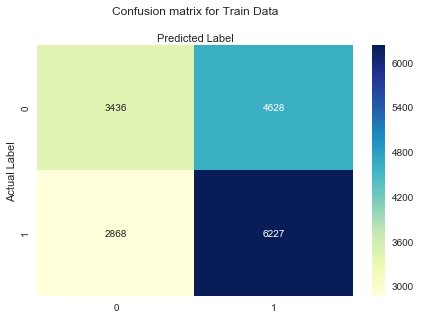

In [20]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [21]:
print('Accuracy : ', metrics.accuracy_score(y_test, pred_test))
print('Precision : ', metrics.precision_score(y_test, pred_test))
print('Recall : ', metrics.recall_score(y_test, pred_test))

Accuracy :  0.5631447054024127
Precision :  0.5736526946107784
Recall :  0.6846619021440352


# <font color=green>ROC Curve</font>

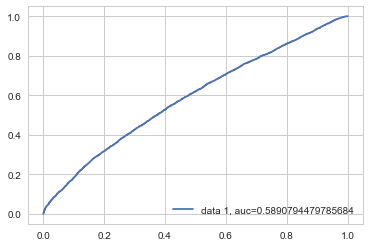

In [22]:
y_pred_proba = logisticRegr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# <font color=green>Load the Test data</font>

In [43]:
test_DF = pd.read_csv("CSE7302c_test-1539668060821.csv",sep=',', na_values=["?"])

In [44]:
test_DF = test_DF.drop(['m_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb','id'], axis=1)

In [45]:
test_DF.shape

(29414, 22)

In [46]:
test_DF['class'] = test_DF['class'].astype('category')

In [47]:
test_DF.dtypes

class                       category
lepton_pT                    float64
lepton_eta                   float64
lepton_phi                   float64
missing_energy_magnitude     float64
missing_energy_phi           float64
jet1pt                       float64
jet1eta                      float64
jet1phi                      float64
jet1b.tag                    float64
jet2pt                       float64
jet2eta                      float64
jet2phi                      float64
jet2b.tag                    float64
jet3pt                       float64
jet3eta                      float64
jet3phi                      float64
jet3b.tag                    float64
jet4pt                       float64
jet4eta                      float64
jet4phi                      float64
jet4b.tag                    float64
dtype: object

In [48]:
test_DF.dropna(inplace=True)

In [49]:
X = test_DF.iloc[:,1:22]
y = test_DF.iloc[:,0]

In [50]:
pred_test = logisticRegr.predict(X)
pred_test.shape

(29413,)

In [51]:
cnf_matrix = metrics.confusion_matrix(y, pred_test)
cnf_matrix

array([[ 5796,  8070],
       [ 4812, 10735]], dtype=int64)

# <font color=green>Confusion Matrix Evaluation Metrics for Test data</font>

Text(0.5,257.44,'Predicted Label')

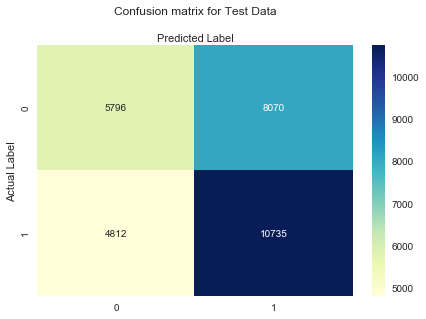

In [52]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Test Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [53]:
print('Accuracy : ', metrics.accuracy_score(y, pred_test))
print('Precision : ', metrics.precision_score(y, pred_test))
print('Recall : ', metrics.recall_score(y, pred_test))

Accuracy :  0.5620303947234216
Precision :  0.5708588141451741
Recall :  0.6904869106580047


# <font color=green>ROC Curve of Test Data</font>

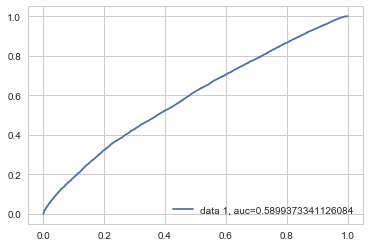

In [54]:
y_pred_proba = logisticRegr.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y, y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Considerering significant variables only

In [4]:
train_DF_3 = pd.read_csv("CSE7302c_train-1539668060821.csv",sep=',')

In [7]:
train_DF_Selected1 = train_DF_3.loc[:,['class','lepton_pT','missing_energy_magnitude','jet1pt','jet1b.tag','jet2b.tag','jet1pt','jet3pt','jet4pt','jet3b.tag','jet4b.tag','m_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb']]

In [8]:
train_DF_Selected1.shape

(68636, 18)

In [10]:
train_DF_Selected1['class'] = train_DF_Selected1['class'].astype('category')

C:\Users\Prateek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
train_DF_Selected1.dtypes

class                       category
lepton_pT                    float64
missing_energy_magnitude     float64
jet1pt                       float64
jet1b.tag                    float64
jet2b.tag                    float64
jet1pt                       float64
jet3pt                       float64
jet4pt                       float64
jet3b.tag                    float64
jet4b.tag                    float64
m_jj                         float64
m_jjj                        float64
m_lv                         float64
m_jlv                        float64
m_bb                         float64
m_wbb                        float64
m_wwbb                       float64
dtype: object

In [12]:
X = train_DF_Selected1.iloc[:,1:18]
y = train_DF_Selected1.iloc[:,0]

In [13]:
X.shape

(68636, 17)

In [14]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(random_state=0)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
pred_test = logisticRegr.predict(X_test)
pred_test.shape

(17159,)

In [17]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, pred_test)
cnf_matrix

array([[4314, 3750],
       [2414, 6681]], dtype=int64)

Text(0.5,257.44,'Predicted Label')

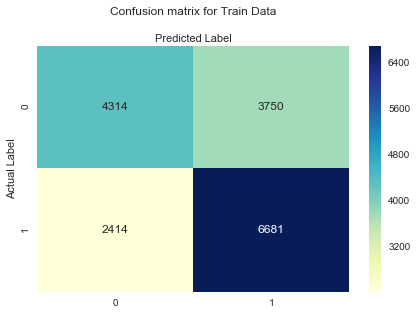

In [18]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [19]:
print('Accuracy : ', metrics.accuracy_score(y_test, pred_test))
print('Precision : ', metrics.precision_score(y_test, pred_test))
print('Recall : ', metrics.recall_score(y_test, pred_test))

Accuracy :  0.6407716067369893
Precision :  0.6404946793212539
Recall :  0.7345794392523365


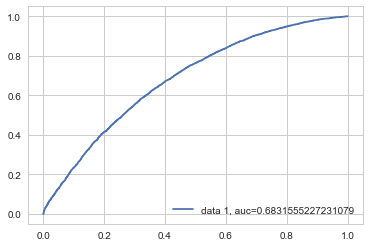

In [20]:
y_pred_proba = logisticRegr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [21]:
test_DF3 = pd.read_csv("CSE7302c_test-1539668060821.csv",sep=',', na_values=["?"])

In [22]:
test_DF3['class'] = test_DF3['class'].astype('category')

In [23]:
test_DF3.dropna(inplace=True)

In [25]:
test_DF_Selected1 = test_DF3.loc[:,['class','lepton_pT','missing_energy_magnitude','jet1pt','jet1b.tag','jet2b.tag','jet1pt','jet3pt','jet4pt','jet3b.tag','jet4b.tag','m_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb']]

In [26]:
test_DF_Selected1.shape

(29413, 18)

In [27]:
X = test_DF_Selected1.iloc[:,1:18]
y = test_DF_Selected1.iloc[:,0]

In [28]:
pred_test3 = logisticRegr.predict(X)
pred_test3.shape

(29413,)

In [29]:
pred_test3

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [30]:
cnf_matrix3 = metrics.confusion_matrix(y, pred_test3)
cnf_matrix3

array([[ 7413,  6453],
       [ 4112, 11435]], dtype=int64)

Text(0.5,257.44,'Predicted Label')

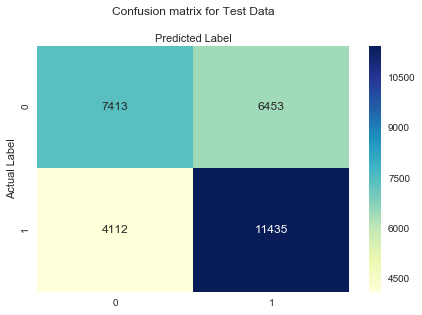

In [31]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix3), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Test Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [33]:
print('Accuracy : ', metrics.accuracy_score(y, pred_test3))
print('Precision : ', metrics.precision_score(y, pred_test3))
print('Recall : ', metrics.recall_score(y, pred_test3))

Accuracy :  0.6408050861863802
Precision :  0.639255366726297
Recall :  0.7355116742779958


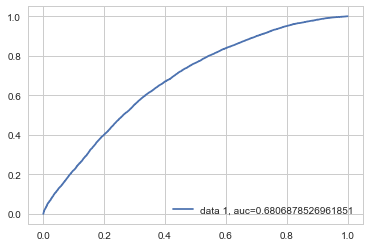

In [34]:
y_pred_proba3 = logisticRegr.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y, y_pred_proba3)
auc = metrics.roc_auc_score(y, y_pred_proba3)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# With Combination : AUC increased to 68.1 % on test data